## what should we predict from the data.whats the outcomes.
since we are workin in the loan data set and from the data set we can 
findout that for new customers by putting all the profile on the sets and predict how eligible and how much can give
the loan for each customer

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [139]:
loan = pd.read_csv('/Users/manibhattarai/Desktop/lesson/train_u6lujuX_CVtuZ9i (1).csv')

In [140]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [141]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


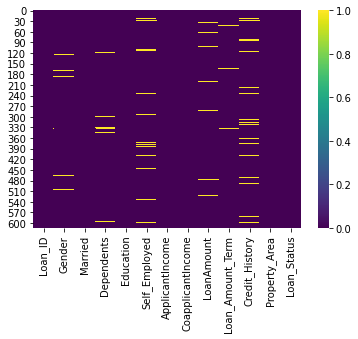

In [142]:
sns.heatmap(loan.isnull(),cmap='viridis')

In [143]:
train_loan = loan.copy()

In [144]:
 train_loan['Gender'].fillna(train_loan['Gender'].value_counts().idxmax(), inplace=True)

In [145]:
train_loan['Married'].fillna(train_loan['Married'].value_counts().idxmax(),inplace=True)

In [146]:
train_loan.Dependents.fillna(train_loan.Dependents.value_counts().idxmax(),inplace=True)
        

In [147]:
train_loan.Self_Employed.fillna(train_loan.Self_Employed.value_counts().idxmax(),inplace=True)

In [148]:
train_loan.LoanAmount.fillna(train_loan.LoanAmount.mean(),inplace=True)

In [149]:
train_loan.Loan_Amount_Term.fillna(train_loan.Loan_Amount_Term.mean(),inplace=True)

In [150]:
train_loan.Credit_History.fillna(train_loan.Credit_History.mean(),inplace=True)

In [151]:
train_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


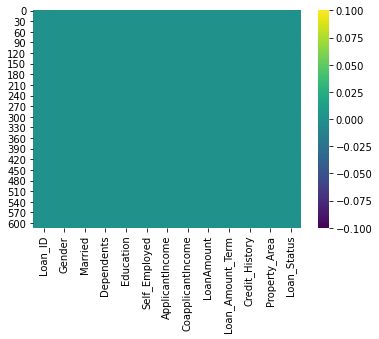

In [152]:
sns.heatmap(train_loan.isnull(),cmap='viridis')

In [157]:
gender_stat = {'Female':1,'Male':0}
graduation_stat = {'Graduate':1,'Not Graduate':0}
Self_employed_stat = {'No':1,'Yes':0}
dependent_stat = {'0':0,'1':1,'2':2,'3+':3}
property_area_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
loan_stat = {'Y':0,'N':1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}


In [159]:
train_loan.Gender = train_loan.Gender.replace(gender_stat)
train_loan.Dependents = train_loan.Dependents.replace(dependent_stat)
train_loan.Self_Employed = train_loan.Self_Employed.replace(Self_employed_stat)
train_loan.Education = train_loan.Education.replace(graduation_stat)
train_loan['Loan_Status'] = train_loan['Loan_Status'].replace(loan_stat)
rain_loan['Property_Area'] = train_loan['Property_Area'].replace(property_stat)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [155]:
train_loan.Gender = train_loan.Gender.replace(gender_stat)
train_loan.Education = train_loan.Education.replace(graduation_stat)
train_loan.Self_Employed = train_loan.Self_Employed.replace(Self_employed_stat)
train_loan.Dependents = train_loan.Dependents.replace(dependent_stat)
train_loan['Loan_Status'] = train_loan['Loan_Status'].replace(loan_stat)


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [156]:
train_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,1,1,5849,0.0,146.412162,360.0,1.0,Urban,0
1,LP001003,0,Yes,1,1,1,4583,1508.0,128.000000,360.0,1.0,Rural,1
2,LP001005,0,Yes,0,1,0,3000,0.0,66.000000,360.0,1.0,Urban,0
3,LP001006,0,Yes,0,0,1,2583,2358.0,120.000000,360.0,1.0,Urban,0
4,LP001008,0,No,0,1,1,6000,0.0,141.000000,360.0,1.0,Urban,0


In [ ]:
train_loan.Credit_History